## Problem Statement

Businesses or companies can fall prey to default if they are not able to keep up their debt obligations. Defaults will lead to a lower credit rating for the company which in turn reduces its chances of getting credit in the future and may have to pay higher interests on existing debts as well as any new obligations. From an investor's point of view, he would want to invest in a company if it is capable of handling its financial obligations, can grow quickly, and is able to manage the growth scale.

A balance sheet is a financial statement of a company that provides a snapshot of what a company owns, owes, and the amount invested by the shareholders. Thus, it is an important tool that helps evaluate the performance of a business.

Data that is available includes information from the financial statement of the companies for the previous year (2015). Also, information about the Networth of the company in the following year (2016) is provided which can be used to drive the labeled field.

Explanation of data fields available in Data Dictionary, 'Credit Default Data Dictionary.xlsx'

### Hints:

Dependent variable - We need to create a default variable that should take the value of 1 when net worth next year is negative & 0 when net worth next year is positive.

Test Train Split -   Split the data into Train and Test dataset in a ratio of 67:33 and use random_state =42. Model Building is to be done on Train Dataset and Model Validation is to be done on Test Dataset.

#### Importing the libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style
import seaborn as sns

from scipy.stats import zscore                                        
from sklearn.preprocessing import StandardScaler                      
from sklearn.preprocessing import MinMaxScaler                        

from sklearn import metrics, model_selection                          
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,accuracy_score,roc_auc_score,roc_curve, precision_recall_curve

from sklearn.model_selection import train_test_split, GridSearchCV    


%matplotlib inline
sns.set(color_codes=True)
sns.set_palette('Accent_r')

%config InlineBackend.figure_format ='retina'

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

#### Importing the dataset

In [2]:
df = pd.read_excel('Company_Data2015-1.xlsx')
df.head()

,Co_Code,Co_Name,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,Current Liabilities and Provisions,Total Assets/Liabilities,Gross Sales,Net Sales,Other Income,Value Of Output,Cost of Production,Selling Cost,PBIDT,PBDT,PBIT,PBT,PAT,Adjusted PAT,CP,Revenue earnings in forex,Revenue expenses in forex,Capital expenses in forex,Book Value (Unit Curr),Book Value (Adj.) (Unit Curr),Market Capitalisation,CEPS (annualised) (Unit Curr),Cash Flow From Operating Activities,Cash Flow From Investing Activities,Cash Flow From Financing Activities,ROG-Net Worth (%),ROG-Capital Employed (%),ROG-Gross Block (%),ROG-Gross Sales (%),ROG-Net Sales (%),ROG-Cost of Production (%),ROG-Total Assets (%),ROG-PBIDT (%),ROG-PBDT (%),ROG-PBIT (%),ROG-PBT (%),ROG-PAT (%),ROG-CP (%),ROG-Revenue earnings in forex (%),ROG-Revenue expenses in forex (%),ROG-Market Capitalisation (%),Current Ratio[Latest],Fixed Assets Ratio[Latest],Inventory Ratio[Latest],Debtors Ratio[Latest],Total Asset Turnover Ratio[Latest],Interest Cover Ratio[Latest],PBIDTM (%)[Latest],PBITM (%)[Latest],PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debtors Velocity (Days),Creditors Velocity (Days),Inventory Velocity (Days),Value of Output/Total Assets,Value of Output/Gross Block
0,16974,Hind.Cables,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,1116.85,109.60,0.00,0.00,7.60,-0.07,137.67,0.00,-179.06,-926.52,-185.53,-932.99,-932.99,-937.85,-926.52,0.00,0.00,0.00,-167.58,-167.58,0.00,-22.09,-102.47,1.46,92.58,-15.31,-20.76,-9.75,0.00,0.00,1.38,-25.75,5.23,-19.29,4.43,-19.33,-19.33,-19.29,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,-0.20,0.00,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00
1,21214,Tata Tele. Mah.,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,1585.74,6043.94,2892.73,2892.73,46.27,2900.71,2572.46,40.51,646.46,-4.32,35.53,-615.25,-615.25,-617.14,-4.32,6.35,143.42,141.17,-15.18,-15.18,1544.39,-0.02,635.91,-785.00,176.93,-26.15,6.30,3.17,5.92,5.92,13.16,6.66,5.24,-108.77,614.89,-9.85,-9.85,-108.77,1.93,34.00,6.61,0.08,0.25,804.44,10.35,0.30,-0.84,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24
2,14852,ABG Shipyard,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,4601.39,12316.07,392.13,392.13,9.55,301.16,408.51,54.83,-281.92,-1086.71,-381.10,-1185.89,-897.70,-873.39,-798.52,0.00,86.36,2.27,94.14,94.14,1220.81,-148.31,-873.40,-458.27,1187.51,-61.86,15.66,-2.07,-75.87,-75.87,-69.93,-0.78,-169.69,-431.68,-221.85,-300.41,-350.43,-642.67,-100.00,-81.21,-6.31,1.06,0.03,0.01,0.42,0.00,-2.21,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26
3,2439,GTL,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,3646.54,6000.42,1354.39,1354.39,223.85,1350.14,1326.99,3.34,-213.01,-677.57,-336.73,-801.29,-801.29,-770.18,-677.57,0.89,28.88,0.00,-39.64,-39.64,194.27,-43.08,324.47,17.31,-412.55,-450.67,-40.84,-1.80,8.33,8.33,16.59,-10.12,-203.84,-102.72,-455.28,-80.23,-70.57,-88.52,-52.91,-33.85,-13.94,0.09,5.08,411.15,9.26,0.00,-0.16,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90
4,23505,Bharati Defence,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,2849.58,7524.91,38.72,38.72,9.82,38.72,186.29,1.97,-647.86,-944.42,-710.13,-1006.69,-864.58,-327.77,-802.31,0.00,15.62,0.00,-212.89,-212.89,113.68,-159.50,-191.54,61.34,143.65,-559.83,-11.76,0.34,-80.61,-80.61,-48.80,-5.81,-40.07,3.28,-38.72,1.87,-2.59,-1.13,-100.00,-91.17,-12.91,0.50,0.05,0.02,1.28,0.01,-0.73,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05


#### Fixing messy column names (containing spaces) for ease of use

In [3]:
df.columns = df.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('%', 'perc').str.replace('/', '_to_').str.replace('[', '_').str.replace(']', '').str.replace('-', '_')

In [4]:
df['Current_Liabilities_and_Provisions'] = df['Current_Liabilities_and_Provisions_']
df['Total_Assets_to_Liabilities'] = df['Total_Assets_to_Liabilities_']
df['Gross_Block'] = df['Gross_Block_']
df['Net_Working_Capital'] = df['Net_Working_Capital_']
df['Current_Assets'] = df['Current_Assets_']
df['Book_Value_Adj_Unit_Curr'] = df['Book_Value_Adj._Unit_Curr']

In [5]:
df.drop(['Current_Liabilities_and_Provisions_', 'Total_Assets_to_Liabilities_', 'Gross_Block_', 'Net_Working_Capital_', 'Current_Assets_', 'Book_Value_Adj._Unit_Curr'], axis=1, inplace=True)

In [6]:
df.head()

,Co_Code,Co_Name,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Sales,Net_Sales,Other_Income,Value_Of_Output,Cost_of_Production,Selling_Cost,PBIDT,PBDT,PBIT,PBT,PAT,Adjusted_PAT,CP,Revenue_earnings_in_forex,Revenue_expenses_in_forex,Capital_expenses_in_forex,Book_Value_Unit_Curr,Market_Capitalisation,CEPS_annualised_Unit_Curr,Cash_Flow_From_Operating_Activities,Cash_Flow_From_Investing_Activities,Cash_Flow_From_Financing_Activities,ROG_Net_Worth_perc,ROG_Capital_Employed_perc,ROG_Gross_Block_perc,ROG_Gross_Sales_perc,ROG_Net_Sales_perc,ROG_Cost_of_Production_perc,ROG_Total_Assets_perc,ROG_PBIDT_perc,ROG_PBDT_perc,ROG_PBIT_perc,ROG_PBT_perc,ROG_PAT_perc,ROG_CP_perc,ROG_Revenue_earnings_in_forex_perc,ROG_Revenue_expenses_in_forex_perc,ROG_Market_Capitalisation_perc,Current_Ratio_Latest,Fixed_Assets_Ratio_Latest,Inventory_Ratio_Latest,Debtors_Ratio_Latest,Total_Asset_Turnover_Ratio_Latest,Interest_Cover_Ratio_Latest,PBIDTM_perc_Latest,PBITM_perc_Latest,PBDTM_perc_Latest,CPM_perc_Latest,APATM_perc_Latest,Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block,Current_Liabilities_and_Provisions,Total_Assets_to_Liabilities,Gross_Block,Net_Working_Capital,Current_Assets,Book_Value_Adj_Unit_Curr
0,16974,Hind.Cables,-8021.60,419.36,-7027.48,-1007.24,5936.03,0.00,0.00,7.60,-0.07,137.67,0.00,-179.06,-926.52,-185.53,-932.99,-932.99,-937.85,-926.52,0.00,0.00,0.00,-167.58,0.00,-22.09,-102.47,1.46,92.58,-15.31,-20.76,-9.75,0.00,0.00,1.38,-25.75,5.23,-19.29,4.43,-19.33,-19.33,-19.29,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,-0.20,0.00,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00,1116.85,109.60,474.30,-1076.34,40.50,-167.58
1,21214,Tata Tele. Mah.,-3986.19,1954.93,-2968.08,4458.20,7410.18,2892.73,2892.73,46.27,2900.71,2572.46,40.51,646.46,-4.32,35.53,-615.25,-615.25,-617.14,-4.32,6.35,143.42,141.17,-15.18,1544.39,-0.02,635.91,-785.00,176.93,-26.15,6.30,3.17,5.92,5.92,13.16,6.66,5.24,-108.77,614.89,-9.85,-9.85,-108.77,1.93,34.00,6.61,0.08,0.25,804.44,10.35,0.30,-0.84,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24,1585.74,6043.94,9070.86,-1098.88,486.86,-15.18
2,14852,ABG Shipyard,-3192.58,53.84,506.86,7714.68,6944.54,392.13,392.13,9.55,301.16,408.51,54.83,-281.92,-1086.71,-381.10,-1185.89,-897.70,-873.39,-798.52,0.00,86.36,2.27,94.14,1220.81,-148.31,-873.40,-458.27,1187.51,-61.86,15.66,-2.07,-75.87,-75.87,-69.93,-0.78,-169.69,-431.68,-221.85,-300.41,-350.43,-642.67,-100.00,-81.21,-6.31,1.06,0.03,0.01,0.42,0.00,-2.21,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26,4601.39,12316.07,1281.54,4496.25,9097.64,94.14
3,2439,GTL,-3054.51,157.30,-623.49,2353.88,2326.05,1354.39,1354.39,223.85,1350.14,1326.99,3.34,-213.01,-677.57,-336.73,-801.29,-801.29,-770.18,-677.57,0.89,28.88,0.00,-39.64,194.27,-43.08,324.47,17.31,-412.55,-450.67,-40.84,-1.80,8.33,8.33,16.59,-10.12,-203.84,-102.72,-455.28,-80.23,-70.57,-88.52,-52.91,-33.85,-13.94,0.09,5.08,411.15,9.26,0.00,-0.16,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90,3646.54,6000.42,1033.69,-2612.42,1034.12,-39.64
4,23505,Bharati Defence,-2967.36,50.30,-1070.83,4675.33,5740.90,38.72,38.72,9.82,38.72,186.29,1.97,-647.86,-944.42,-710.13,-1006.69,-864.58,-327.77,-802.31,0.00,15.62,0.00,-212.89,113.68,-159.50,-191.54,61.34,143.65,-559.83,-11.76,0.34,-80.61,-80.61,-48.80,-5.81,-40.07,3.28,-38.72,1.87,-2.59,-1.13,-100.00,-91.17,-12.91,0.50,0.05,0.02,1.28,0.01,-0.73,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05,2849.58,7524.91,1084.20,1836.23,4685.81,-212.89


#### First, let us check the number of rows (observations) and the number of columns (variables).

In [7]:
print('The number of rows (observations) is',df.shape[0],'\n''The number of columns (variables) is',df.shape[1])

The number of rows (observations) is 3586 
The number of columns (variables) is 67


#### Data types of all variables

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 67 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Co_Code                              3586 non-null   int64  
 1   Co_Name                              3586 non-null   object 
 2   Networth_Next_Year                   3586 non-null   float64
 3   Equity_Paid_Up                       3586 non-null   float64
 4   Networth                             3586 non-null   float64
 5   Capital_Employed                     3586 non-null   float64
 6   Total_Debt                           3586 non-null   float64
 7   Gross_Sales                          3586 non-null   float64
 8   Net_Sales                            3586 non-null   float64
 9   Other_Income                         3586 non-null   float64
 10  Value_Of_Output                      3586 non-null   float64
 11  Cost_of_Production            

In [9]:
df.duplicated().sum()

0

In [10]:
df.drop(['Co_Code', 'Co_Name'], axis=1, inplace=True)
df.head()

,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Sales,Net_Sales,Other_Income,Value_Of_Output,Cost_of_Production,Selling_Cost,PBIDT,PBDT,PBIT,PBT,PAT,Adjusted_PAT,CP,Revenue_earnings_in_forex,Revenue_expenses_in_forex,Capital_expenses_in_forex,Book_Value_Unit_Curr,Market_Capitalisation,CEPS_annualised_Unit_Curr,Cash_Flow_From_Operating_Activities,Cash_Flow_From_Investing_Activities,Cash_Flow_From_Financing_Activities,ROG_Net_Worth_perc,ROG_Capital_Employed_perc,ROG_Gross_Block_perc,ROG_Gross_Sales_perc,ROG_Net_Sales_perc,ROG_Cost_of_Production_perc,ROG_Total_Assets_perc,ROG_PBIDT_perc,ROG_PBDT_perc,ROG_PBIT_perc,ROG_PBT_perc,ROG_PAT_perc,ROG_CP_perc,ROG_Revenue_earnings_in_forex_perc,ROG_Revenue_expenses_in_forex_perc,ROG_Market_Capitalisation_perc,Current_Ratio_Latest,Fixed_Assets_Ratio_Latest,Inventory_Ratio_Latest,Debtors_Ratio_Latest,Total_Asset_Turnover_Ratio_Latest,Interest_Cover_Ratio_Latest,PBIDTM_perc_Latest,PBITM_perc_Latest,PBDTM_perc_Latest,CPM_perc_Latest,APATM_perc_Latest,Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block,Current_Liabilities_and_Provisions,Total_Assets_to_Liabilities,Gross_Block,Net_Working_Capital,Current_Assets,Book_Value_Adj_Unit_Curr
0,-8021.60,419.36,-7027.48,-1007.24,5936.03,0.00,0.00,7.60,-0.07,137.67,0.00,-179.06,-926.52,-185.53,-932.99,-932.99,-937.85,-926.52,0.00,0.00,0.00,-167.58,0.00,-22.09,-102.47,1.46,92.58,-15.31,-20.76,-9.75,0.00,0.00,1.38,-25.75,5.23,-19.29,4.43,-19.33,-19.33,-19.29,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,-0.20,0.00,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00,1116.85,109.60,474.30,-1076.34,40.50,-167.58
1,-3986.19,1954.93,-2968.08,4458.20,7410.18,2892.73,2892.73,46.27,2900.71,2572.46,40.51,646.46,-4.32,35.53,-615.25,-615.25,-617.14,-4.32,6.35,143.42,141.17,-15.18,1544.39,-0.02,635.91,-785.00,176.93,-26.15,6.30,3.17,5.92,5.92,13.16,6.66,5.24,-108.77,614.89,-9.85,-9.85,-108.77,1.93,34.00,6.61,0.08,0.25,804.44,10.35,0.30,-0.84,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24,1585.74,6043.94,9070.86,-1098.88,486.86,-15.18
2,-3192.58,53.84,506.86,7714.68,6944.54,392.13,392.13,9.55,301.16,408.51,54.83,-281.92,-1086.71,-381.10,-1185.89,-897.70,-873.39,-798.52,0.00,86.36,2.27,94.14,1220.81,-148.31,-873.40,-458.27,1187.51,-61.86,15.66,-2.07,-75.87,-75.87,-69.93,-0.78,-169.69,-431.68,-221.85,-300.41,-350.43,-642.67,-100.00,-81.21,-6.31,1.06,0.03,0.01,0.42,0.00,-2.21,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26,4601.39,12316.07,1281.54,4496.25,9097.64,94.14
3,-3054.51,157.30,-623.49,2353.88,2326.05,1354.39,1354.39,223.85,1350.14,1326.99,3.34,-213.01,-677.57,-336.73,-801.29,-801.29,-770.18,-677.57,0.89,28.88,0.00,-39.64,194.27,-43.08,324.47,17.31,-412.55,-450.67,-40.84,-1.80,8.33,8.33,16.59,-10.12,-203.84,-102.72,-455.28,-80.23,-70.57,-88.52,-52.91,-33.85,-13.94,0.09,5.08,411.15,9.26,0.00,-0.16,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90,3646.54,6000.42,1033.69,-2612.42,1034.12,-39.64
4,-2967.36,50.30,-1070.83,4675.33,5740.90,38.72,38.72,9.82,38.72,186.29,1.97,-647.86,-944.42,-710.13,-1006.69,-864.58,-327.77,-802.31,0.00,15.62,0.00,-212.89,113.68,-159.50,-191.54,61.34,143.65,-559.83,-11.76,0.34,-80.61,-80.61,-48.80,-5.81,-40.07,3.28,-38.72,1.87,-2.59,-1.13,-100.00,-91.17,-12.91,0.50,0.05,0.02,1.28,0.01,-0.73,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05,2849.58,7524.91,1084.20,1836.23,4685.81,-212.89


#### Now, let us check the basic measures of descriptive statistics for the continuous variables.

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Networth_Next_Year,3586.0,725.045251,4769.681004,-8021.60,3.9850,19.015,123.8025,111729.10
Equity_Paid_Up,3586.0,62.966584,778.761744,0.00,3.7500,8.290,19.5175,42263.46
Networth,3586.0,649.746299,4091.988792,-7027.48,3.8925,18.580,117.2975,81657.35
Capital_Employed,3586.0,2799.611054,26975.135385,-1824.75,7.6025,39.090,226.6050,714001.25
Total_Debt,3586.0,1994.823779,23652.842746,-0.72,0.0300,7.490,72.3500,652823.81
Gross_Sales,3586.0,1123.738985,10603.703837,-62.59,1.4425,31.210,242.2500,474182.94
Net_Sales,3586.0,1079.702579,9996.574173,-62.59,1.4400,30.440,234.4400,443775.16
Other_Income,3586.0,48.729824,426.040665,-448.72,0.0200,0.450,3.6350,14143.40
Value_Of_Output,3586.0,1077.187292,9843.880293,-119.10,1.4125,30.895,235.8375,435559.09
Cost_of_Production,3586.0,798.544621,9076.702982,-22.65,0.9400,25.990,189.5500,419913.50


#### Now, let us check the basic measures of descriptive statistics for the categorical variables.

In [12]:
df_orig = df.copy()
df['default'] = np.where(df['Networth_Next_Year']>=0, 0, 1)
df[['default', 'Networth_Next_Year']].head().to_csv('target_head.csv')
df[['default', 'Networth_Next_Year']].tail().to_csv('target_tail.csv')

In [13]:
df.drop('Networth_Next_Year', axis=1, inplace=True)
df.head()

,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Sales,Net_Sales,Other_Income,Value_Of_Output,Cost_of_Production,Selling_Cost,PBIDT,PBDT,PBIT,PBT,PAT,Adjusted_PAT,CP,Revenue_earnings_in_forex,Revenue_expenses_in_forex,Capital_expenses_in_forex,Book_Value_Unit_Curr,Market_Capitalisation,CEPS_annualised_Unit_Curr,Cash_Flow_From_Operating_Activities,Cash_Flow_From_Investing_Activities,Cash_Flow_From_Financing_Activities,ROG_Net_Worth_perc,ROG_Capital_Employed_perc,ROG_Gross_Block_perc,ROG_Gross_Sales_perc,ROG_Net_Sales_perc,ROG_Cost_of_Production_perc,ROG_Total_Assets_perc,ROG_PBIDT_perc,ROG_PBDT_perc,ROG_PBIT_perc,ROG_PBT_perc,ROG_PAT_perc,ROG_CP_perc,ROG_Revenue_earnings_in_forex_perc,ROG_Revenue_expenses_in_forex_perc,ROG_Market_Capitalisation_perc,Current_Ratio_Latest,Fixed_Assets_Ratio_Latest,Inventory_Ratio_Latest,Debtors_Ratio_Latest,Total_Asset_Turnover_Ratio_Latest,Interest_Cover_Ratio_Latest,PBIDTM_perc_Latest,PBITM_perc_Latest,PBDTM_perc_Latest,CPM_perc_Latest,APATM_perc_Latest,Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block,Current_Liabilities_and_Provisions,Total_Assets_to_Liabilities,Gross_Block,Net_Working_Capital,Current_Assets,Book_Value_Adj_Unit_Curr,default
0,419.36,-7027.48,-1007.24,5936.03,0.00,0.00,7.60,-0.07,137.67,0.00,-179.06,-926.52,-185.53,-932.99,-932.99,-937.85,-926.52,0.00,0.00,0.00,-167.58,0.00,-22.09,-102.47,1.46,92.58,-15.31,-20.76,-9.75,0.00,0.00,1.38,-25.75,5.23,-19.29,4.43,-19.33,-19.33,-19.29,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,-0.20,0.00,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00,1116.85,109.60,474.30,-1076.34,40.50,-167.58,1
1,1954.93,-2968.08,4458.20,7410.18,2892.73,2892.73,46.27,2900.71,2572.46,40.51,646.46,-4.32,35.53,-615.25,-615.25,-617.14,-4.32,6.35,143.42,141.17,-15.18,1544.39,-0.02,635.91,-785.00,176.93,-26.15,6.30,3.17,5.92,5.92,13.16,6.66,5.24,-108.77,614.89,-9.85,-9.85,-108.77,1.93,34.00,6.61,0.08,0.25,804.44,10.35,0.30,-0.84,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24,1585.74,6043.94,9070.86,-1098.88,486.86,-15.18,1
2,53.84,506.86,7714.68,6944.54,392.13,392.13,9.55,301.16,408.51,54.83,-281.92,-1086.71,-381.10,-1185.89,-897.70,-873.39,-798.52,0.00,86.36,2.27,94.14,1220.81,-148.31,-873.40,-458.27,1187.51,-61.86,15.66,-2.07,-75.87,-75.87,-69.93,-0.78,-169.69,-431.68,-221.85,-300.41,-350.43,-642.67,-100.00,-81.21,-6.31,1.06,0.03,0.01,0.42,0.00,-2.21,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26,4601.39,12316.07,1281.54,4496.25,9097.64,94.14,1
3,157.30,-623.49,2353.88,2326.05,1354.39,1354.39,223.85,1350.14,1326.99,3.34,-213.01,-677.57,-336.73,-801.29,-801.29,-770.18,-677.57,0.89,28.88,0.00,-39.64,194.27,-43.08,324.47,17.31,-412.55,-450.67,-40.84,-1.80,8.33,8.33,16.59,-10.12,-203.84,-102.72,-455.28,-80.23,-70.57,-88.52,-52.91,-33.85,-13.94,0.09,5.08,411.15,9.26,0.00,-0.16,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90,3646.54,6000.42,1033.69,-2612.42,1034.12,-39.64,1
4,50.30,-1070.83,4675.33,5740.90,38.72,38.72,9.82,38.72,186.29,1.97,-647.86,-944.42,-710.13,-1006.69,-864.58,-327.77,-802.31,0.00,15.62,0.00,-212.89,113.68,-159.50,-191.54,61.34,143.65,-559.83,-11.76,0.34,-80.61,-80.61,-48.80,-5.81,-40.07,3.28,-38.72,1.87,-2.59,-1.13,-100.00,-91.17,-12.91,0.50,0.05,0.02,1.28,0.01,-0.73,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05,2849.58,7524.91,1084.20,1836.23,4685.81,-212.89,1


#### Checking proportion of default

In [14]:
df.default.sum() / len(df.default)

0.1079196876742889

#### Check for missing values

In [15]:
df.isnull().sum()

Equity_Paid_Up                           0
Networth                                 0
Capital_Employed                         0
Total_Debt                               0
Gross_Sales                              0
Net_Sales                                0
Other_Income                             0
Value_Of_Output                          0
Cost_of_Production                       0
Selling_Cost                             0
PBIDT                                    0
PBDT                                     0
PBIT                                     0
PBT                                      0
PAT                                      0
Adjusted_PAT                             0
CP                                       0
Revenue_earnings_in_forex                0
Revenue_expenses_in_forex                0
Capital_expenses_in_forex                0
Book_Value_Unit_Curr                     0
Market_Capitalisation                    0
CEPS_annualised_Unit_Curr                0
Cash_Flow_F

In [16]:
print('PERCENT OF MISSING VALUES TO THE WHOLE DATA:')
print('')
round(df.isna().sum()*100/df.shape[0], 2)

PERCENT OF MISSING VALUES TO THE WHOLE DATA:



Equity_Paid_Up                         0.00
Networth                               0.00
Capital_Employed                       0.00
Total_Debt                             0.00
Gross_Sales                            0.00
Net_Sales                              0.00
Other_Income                           0.00
Value_Of_Output                        0.00
Cost_of_Production                     0.00
Selling_Cost                           0.00
PBIDT                                  0.00
PBDT                                   0.00
PBIT                                   0.00
PBT                                    0.00
PAT                                    0.00
Adjusted_PAT                           0.00
CP                                     0.00
Revenue_earnings_in_forex              0.00
Revenue_expenses_in_forex              0.00
Capital_expenses_in_forex              0.00
Book_Value_Unit_Curr                   0.00
Market_Capitalisation                  0.00
CEPS_annualised_Unit_Curr       

In [17]:
print('Percent of Total Missing Values in the data =' ,(df.isna().sum().sum()*100/df.size).round(2), "%")

Percent of Total Missing Values in the data = 0.05 %


In [18]:
(df.drop('default', axis=1)==0).sum().sort_values(ascending=False)

Capital_expenses_in_forex              2892
ROG_Revenue_earnings_in_forex_perc     2269
Revenue_earnings_in_forex              2230
ROG_Revenue_expenses_in_forex_perc     1971
Revenue_expenses_in_forex              1909
ROG_Market_Capitalisation_perc         1422
Market_Capitalisation                  1249
Inventory_Velocity_Days                1123
Inventory_Ratio_Latest                 1100
Interest_Cover_Ratio_Latest            1001
ROG_Gross_Block_perc                    940
Selling_Cost                            938
Total_Debt                              844
Debtors_Ratio_Latest                    745
Debtors_Velocity_Days                   729
Creditors_Velocity_Days                 704
Other_Income                            690
Cash_Flow_From_Financing_Activities     656
Value_of_Output_to_Gross_Block          611
Fixed_Assets_Ratio_Latest               607
Cash_Flow_From_Investing_Activities     510
Total_Asset_Turnover_Ratio_Latest       493
Value_of_Output_to_Total_Assets 

In [19]:
round(((df.drop('default', axis=1)==0).sum())*100/df.shape[0], 2).sort_values(ascending=False)

Capital_expenses_in_forex              80.65
ROG_Revenue_earnings_in_forex_perc     63.27
Revenue_earnings_in_forex              62.19
ROG_Revenue_expenses_in_forex_perc     54.96
Revenue_expenses_in_forex              53.23
ROG_Market_Capitalisation_perc         39.65
Market_Capitalisation                  34.83
Inventory_Velocity_Days                31.32
Inventory_Ratio_Latest                 30.67
Interest_Cover_Ratio_Latest            27.91
ROG_Gross_Block_perc                   26.21
Selling_Cost                           26.16
Total_Debt                             23.54
Debtors_Ratio_Latest                   20.78
Debtors_Velocity_Days                  20.33
Creditors_Velocity_Days                19.63
Other_Income                           19.24
Cash_Flow_From_Financing_Activities    18.29
Value_of_Output_to_Gross_Block         17.04
Fixed_Assets_Ratio_Latest              16.93
Cash_Flow_From_Investing_Activities    14.22
Total_Asset_Turnover_Ratio_Latest      13.75
Value_of_O

In [20]:
((df.drop('default', axis=1)==0).sum().sum())*100/df.drop('default', axis=1).size

15.111719185722253

In [21]:
df.drop(['Capital_expenses_in_forex', 'ROG_Revenue_earnings_in_forex_perc', 'Revenue_earnings_in_forex', 'ROG_Revenue_expenses_in_forex_perc', 'Revenue_expenses_in_forex', 'ROG_Market_Capitalisation_perc', 'Market_Capitalisation', 'Inventory_Velocity_Days', 'Inventory_Ratio_Latest'], axis=1, inplace=True)
df.shape

(3586, 56)

In [22]:
df1 = df.drop('default', axis=1)
df1[df1==0] = np.nan
(df1==0).sum()
(df1==0).shape
df1.shape

(3586, 55)

In [23]:
df1['default'] = df['default']
df_rows = df1[df1.isna().sum(axis=1)>5]
df_rows.shape

(1004, 56)

In [24]:
df1['default'].value_counts()

0    3199
1     387
Name: default, dtype: int64

In [25]:
df_x = df1.drop('default', axis=1)
df_y = df1['default']

In [26]:
df1.isna().sum()

Equity_Paid_Up                            1
Networth                                  3
Capital_Employed                          5
Total_Debt                              844
Gross_Sales                             305
Net_Sales                               306
Other_Income                            690
Value_Of_Output                         290
Cost_of_Production                      159
Selling_Cost                            938
PBIDT                                   102
PBDT                                    108
PBIT                                    109
PBT                                     119
PAT                                     121
Adjusted_PAT                            124
CP                                      111
Book_Value_Unit_Curr                      1
CEPS_annualised_Unit_Curr               139
Cash_Flow_From_Operating_Activities     180
Cash_Flow_From_Investing_Activities     510
Cash_Flow_From_Financing_Activities     656
ROG_Net_Worth_perc              

In [27]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=10)

df_imputed = pd.DataFrame(imputer.fit_transform(df), columns = df.columns)

df_imputed.isnull().sum()

Equity_Paid_Up                         0
Networth                               0
Capital_Employed                       0
Total_Debt                             0
Gross_Sales                            0
Net_Sales                              0
Other_Income                           0
Value_Of_Output                        0
Cost_of_Production                     0
Selling_Cost                           0
PBIDT                                  0
PBDT                                   0
PBIT                                   0
PBT                                    0
PAT                                    0
Adjusted_PAT                           0
CP                                     0
Book_Value_Unit_Curr                   0
CEPS_annualised_Unit_Curr              0
Cash_Flow_From_Operating_Activities    0
Cash_Flow_From_Investing_Activities    0
Cash_Flow_From_Financing_Activities    0
ROG_Net_Worth_perc                     0
ROG_Capital_Employed_perc              0
ROG_Gross_Block_

In [28]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [29]:
df_x = df_imputed.drop('default', axis=1)
df_y = df_imputed['default']

In [30]:
for column in df_x.columns:
    lr,ur=remove_outlier(df_x[column])
    df_x[column]=np.where(df_x[column]>ur,ur,df_x[column])
    df_x[column]=np.where(df_x[column]<lr,lr,df_x[column])

In [31]:
df = pd.concat([df_x, df_y], axis = 1)

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [33]:
X = df_x.copy()
f = calc_vif(X).sort_values(by = 'VIF', ascending = False)
f

,variables,VIF
5,Net_Sales,1683.767532
4,Gross_Sales,949.840044
7,Value_Of_Output,690.213062
25,ROG_Gross_Sales_perc,541.534859
26,ROG_Net_Sales_perc,540.981188
11,PBDT,117.491602
50,Total_Assets_to_Liabilities,105.133540
16,CP,104.103997
14,PAT,76.742267
13,PBT,75.516956


In [34]:
X.shape
X.columns

Index(['Equity_Paid_Up', 'Networth', 'Capital_Employed', 'Total_Debt', 'Gross_Sales', 'Net_Sales', 'Other_Income', 'Value_Of_Output', 'Cost_of_Production', 'Selling_Cost', 'PBIDT', 'PBDT', 'PBIT', 'PBT', 'PAT', 'Adjusted_PAT', 'CP', 'Book_Value_Unit_Curr', 'CEPS_annualised_Unit_Curr', 'Cash_Flow_From_Operating_Activities', 'Cash_Flow_From_Investing_Activities', 'Cash_Flow_From_Financing_Activities', 'ROG_Net_Worth_perc', 'ROG_Capital_Employed_perc', 'ROG_Gross_Block_perc', 'ROG_Gross_Sales_perc', 'ROG_Net_Sales_perc', 'ROG_Cost_of_Production_perc', 'ROG_Total_Assets_perc', 'ROG_PBIDT_perc', 'ROG_PBDT_perc', 'ROG_PBIT_perc', 'ROG_PBT_perc', 'ROG_PAT_perc', 'ROG_CP_perc', 'Current_Ratio_Latest', 'Fixed_Assets_Ratio_Latest', 'Debtors_Ratio_Latest', 'Total_Asset_Turnover_Ratio_Latest', 'Interest_Cover_Ratio_Latest', 'PBIDTM_perc_Latest', 'PBITM_perc_Latest', 'PBDTM_perc_Latest', 'CPM_perc_Latest', 'APATM_perc_Latest', 'Debtors_Velocity_Days', 'Creditors_Velocity_Days',
       'Value_of_Out

In [35]:
import time
start = time.time()

for i in range(55):
    v = calc_vif(X).sort_values(by = 'VIF', ascending = False)
    if (v.iloc[0,1] > 5):
        X = X.drop(columns=v.iloc[0,0])

end = time.time()
print('Time taken =', end-start)

Time taken = 23.301965713500977


In [36]:
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
5,CEPS_annualised_Unit_Curr,4.532596
1,Total_Debt,3.992792
10,ROG_Capital_Employed_perc,3.851530
6,Cash_Flow_From_Operating_Activities,3.561930
0,Equity_Paid_Up,3.557010
3,Selling_Cost,3.553868
2,Other_Income,3.419326
4,Adjusted_PAT,3.329176
26,Book_Value_Adj_Unit_Curr,3.267017
16,ROG_CP_perc,3.248804


In [37]:
X.shape
X.head()

,Equity_Paid_Up,Total_Debt,Other_Income,Selling_Cost,Adjusted_PAT,CEPS_annualised_Unit_Curr,Cash_Flow_From_Operating_Activities,Cash_Flow_From_Investing_Activities,Cash_Flow_From_Financing_Activities,ROG_Net_Worth_perc,ROG_Capital_Employed_perc,ROG_Gross_Block_perc,ROG_Net_Sales_perc,ROG_Cost_of_Production_perc,ROG_Total_Assets_perc,ROG_PBIT_perc,ROG_CP_perc,Current_Ratio_Latest,Debtors_Ratio_Latest,Total_Asset_Turnover_Ratio_Latest,Interest_Cover_Ratio_Latest,PBITM_perc_Latest,Debtors_Velocity_Days,Creditors_Velocity_Days,Value_of_Output_to_Gross_Block,Net_Working_Capital,Book_Value_Adj_Unit_Curr
0,43.16875,180.83,7.6000,0.00000,-8.23875,-13.15875,-19.74,1.46000,9.915,-15.3100,-20.76000,-9.75,0.000,1.38,-25.75,4.430,-19.29000,0.02,0.00,0.00,-0.20,0.0000,0.0,0.0,0.00,-89.40625,-72.29
1,43.16875,180.83,9.0575,9.70625,-8.23875,-0.02000,32.08,-12.97375,9.915,-20.7625,6.30000,3.17,5.920,13.16,6.66,172.385,-108.77000,0.08,10.35,0.30,-0.84,-21.4275,29.0,101.0,0.24,-89.40625,-15.18
2,43.16875,180.83,9.0575,9.70625,-8.23875,-13.15875,-19.74,-12.97375,9.915,-20.7625,15.66000,-2.07,-52.645,-52.79,-0.78,-153.595,-153.12375,1.06,0.42,0.00,-2.21,-21.4275,97.0,210.5,-0.26,151.52375,94.14
3,43.16875,180.83,9.0575,3.34000,-8.23875,-13.15875,32.08,7.97625,-15.305,-20.7625,-28.46875,-1.80,8.330,16.59,-10.12,-153.595,-88.52000,0.09,9.26,0.00,-0.16,-7.2100,93.0,63.0,1.90,-89.40625,-39.64
4,43.16875,180.83,9.0575,1.97000,-8.23875,-13.15875,-19.74,7.97625,9.915,-20.7625,-11.76000,0.34,-52.645,-48.80,-5.81,-38.720,-1.13000,0.50,1.28,0.01,-0.73,-21.4275,253.0,210.5,0.05,151.52375,-72.29


In [38]:
sc = StandardScaler()
scaled_x = pd.DataFrame(sc.fit_transform(X), columns=X.columns)
scaled_x.shape
scaled_x.head()

,Equity_Paid_Up,Total_Debt,Other_Income,Selling_Cost,Adjusted_PAT,CEPS_annualised_Unit_Curr,Cash_Flow_From_Operating_Activities,Cash_Flow_From_Investing_Activities,Cash_Flow_From_Financing_Activities,ROG_Net_Worth_perc,ROG_Capital_Employed_perc,ROG_Gross_Block_perc,ROG_Net_Sales_perc,ROG_Cost_of_Production_perc,ROG_Total_Assets_perc,ROG_PBIT_perc,ROG_CP_perc,Current_Ratio_Latest,Debtors_Ratio_Latest,Total_Asset_Turnover_Ratio_Latest,Interest_Cover_Ratio_Latest,PBITM_perc_Latest,Debtors_Velocity_Days,Creditors_Velocity_Days,Value_of_Output_to_Gross_Block,Net_Working_Capital,Book_Value_Adj_Unit_Curr
0,2.08394,1.955653,1.501295,-0.666143,-1.67389,-1.999442,-1.819798,0.652420,1.602304,-1.359175,-1.484629,-1.659245,-0.206984,-0.196704,-1.833941,-0.064694,-0.359990,-1.142918,-0.903810,-0.892172,-0.581660,-0.472233,-0.919807,-0.916426,-0.818491,-2.126873,-2.203918
1,2.08394,1.955653,1.924923,1.942957,-1.67389,-0.537951,1.786180,-1.754079,1.602304,-1.740519,0.115171,0.029268,-0.022284,0.159264,0.145722,1.901880,-1.387497,-1.109696,0.655805,-0.622112,-0.744410,-1.874921,-0.565502,0.565924,-0.759968,-2.126873,-1.063881
2,2.08394,1.955653,1.924923,1.942957,-1.67389,-1.999442,-1.819798,-1.754079,1.602304,-1.740519,0.668539,-0.655547,-1.849473,-1.833612,-0.308727,-1.914997,-1.896815,-0.567081,-0.840521,-0.892172,-1.092796,-1.874921,0.265280,2.173027,-0.881892,1.933358,1.118379
3,2.08394,1.955653,1.924923,0.231669,-1.67389,-1.999442,1.786180,1.738857,-1.722936,-1.740519,-1.940375,-0.620261,0.052907,0.262912,-0.879232,-1.914997,-1.154964,-1.104160,0.491556,-0.892172,-0.571488,-0.944214,0.216411,0.008208,-0.355179,-2.126873,-1.552155
4,2.08394,1.955653,1.924923,-0.136595,-1.67389,-1.999442,-1.819798,1.738857,1.602304,-1.740519,-0.952545,-0.340584,-1.849473,-1.713042,-0.615969,-0.569934,-0.151457,-0.877147,-0.710930,-0.883170,-0.716437,-1.874921,2.171193,2.173027,-0.806299,1.933358,-2.203918


In [39]:
df_1 = pd.concat([scaled_x, df_y], axis=1)
df_1.head()

,Equity_Paid_Up,Total_Debt,Other_Income,Selling_Cost,Adjusted_PAT,CEPS_annualised_Unit_Curr,Cash_Flow_From_Operating_Activities,Cash_Flow_From_Investing_Activities,Cash_Flow_From_Financing_Activities,ROG_Net_Worth_perc,ROG_Capital_Employed_perc,ROG_Gross_Block_perc,ROG_Net_Sales_perc,ROG_Cost_of_Production_perc,ROG_Total_Assets_perc,ROG_PBIT_perc,ROG_CP_perc,Current_Ratio_Latest,Debtors_Ratio_Latest,Total_Asset_Turnover_Ratio_Latest,Interest_Cover_Ratio_Latest,PBITM_perc_Latest,Debtors_Velocity_Days,Creditors_Velocity_Days,Value_of_Output_to_Gross_Block,Net_Working_Capital,Book_Value_Adj_Unit_Curr,default
0,2.08394,1.955653,1.501295,-0.666143,-1.67389,-1.999442,-1.819798,0.652420,1.602304,-1.359175,-1.484629,-1.659245,-0.206984,-0.196704,-1.833941,-0.064694,-0.359990,-1.142918,-0.903810,-0.892172,-0.581660,-0.472233,-0.919807,-0.916426,-0.818491,-2.126873,-2.203918,1.0
1,2.08394,1.955653,1.924923,1.942957,-1.67389,-0.537951,1.786180,-1.754079,1.602304,-1.740519,0.115171,0.029268,-0.022284,0.159264,0.145722,1.901880,-1.387497,-1.109696,0.655805,-0.622112,-0.744410,-1.874921,-0.565502,0.565924,-0.759968,-2.126873,-1.063881,1.0
2,2.08394,1.955653,1.924923,1.942957,-1.67389,-1.999442,-1.819798,-1.754079,1.602304,-1.740519,0.668539,-0.655547,-1.849473,-1.833612,-0.308727,-1.914997,-1.896815,-0.567081,-0.840521,-0.892172,-1.092796,-1.874921,0.265280,2.173027,-0.881892,1.933358,1.118379,1.0
3,2.08394,1.955653,1.924923,0.231669,-1.67389,-1.999442,1.786180,1.738857,-1.722936,-1.740519,-1.940375,-0.620261,0.052907,0.262912,-0.879232,-1.914997,-1.154964,-1.104160,0.491556,-0.892172,-0.571488,-0.944214,0.216411,0.008208,-0.355179,-2.126873,-1.552155,1.0
4,2.08394,1.955653,1.924923,-0.136595,-1.67389,-1.999442,-1.819798,1.738857,1.602304,-1.740519,-0.952545,-0.340584,-1.849473,-1.713042,-0.615969,-0.569934,-0.151457,-0.877147,-0.710930,-0.883170,-0.716437,-1.874921,2.171193,2.173027,-0.806299,1.933358,-2.203918,1.0


In [40]:
X_train, X_test, y_train, y_test = train_test_split(scaled_x, df_y, test_size = 0.33, random_state=42)

In [41]:
df1_train = pd.concat([X_train, y_train], axis=1)

# Linear Discriminant Analysis

In [42]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier

In [43]:
LDA = LinearDiscriminantAnalysis()

In [44]:
lda_model = LDA.fit(X_train, y_train)

In [45]:
pred_train_lda = lda_model.predict(X_train)
pred_test_lda = lda_model.predict(X_test)

In [46]:
print(metrics.classification_report(y_train, pred_train_lda))

              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97      2157
         1.0       0.81      0.57      0.67       245

    accuracy                           0.94      2402
   macro avg       0.88      0.78      0.82      2402
weighted avg       0.94      0.94      0.94      2402



AUC: 0.952


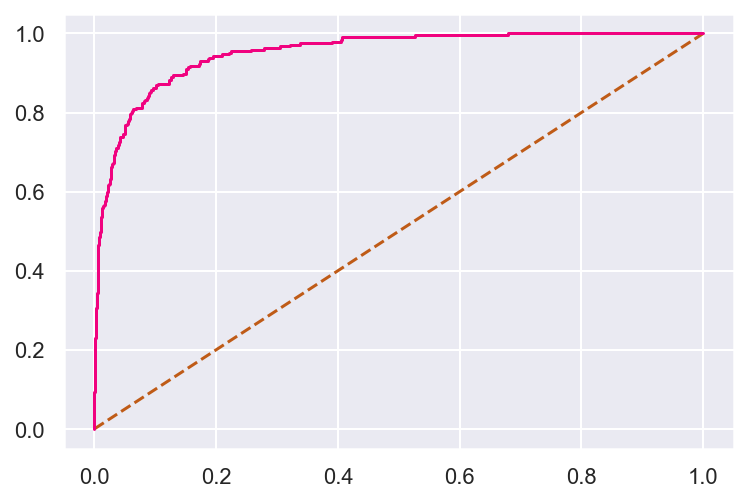

In [47]:
probs = lda_model.predict_proba(X_train)
probs = probs[:, 1]
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr);

In [48]:
print(metrics.classification_report(y_test, pred_test_lda))

              precision    recall  f1-score   support

         0.0       0.95      0.98      0.96      1042
         1.0       0.78      0.61      0.68       142

    accuracy                           0.93      1184
   macro avg       0.86      0.79      0.82      1184
weighted avg       0.93      0.93      0.93      1184



AUC: 0.947


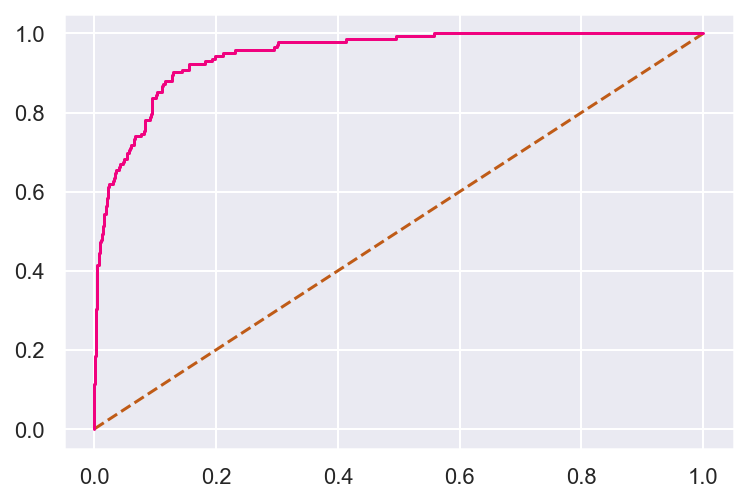

In [49]:
probs = lda_model.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
train_fpr, train_tpr, train_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr);

In [50]:
pred_train_lda_prob = lda_model.predict_proba(X_train)[:,1]
pred_test_lda_prob = lda_model.predict_proba(X_test)[:,1]

In [51]:
fpr, tpr, thresholds = roc_curve(y_train,pred_train_lda_prob)

In [52]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.13140895885131224

In [74]:
y_class_pred=[]
for i in range(0,len(pred_train_lda_prob)):
    if np.array(pred_train_lda_prob)[i]>0.13:
        a=1
    else:
        a=0
    y_class_pred.append(a)

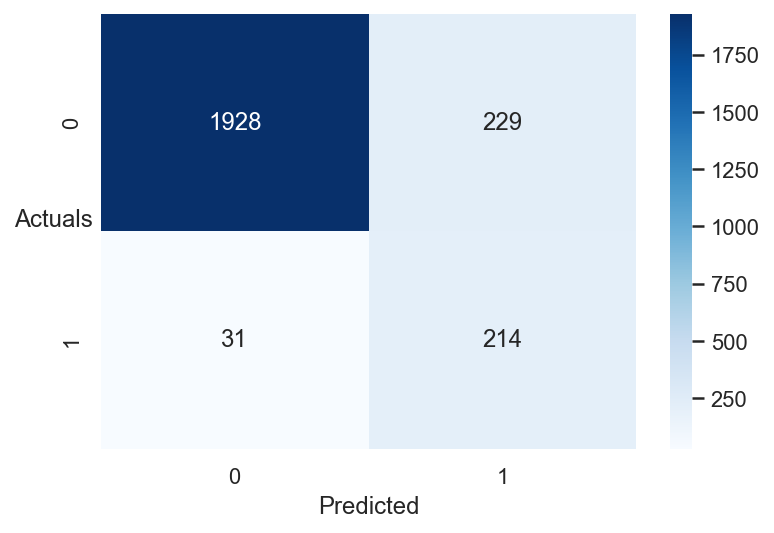

In [75]:
sns.heatmap((metrics.confusion_matrix(y_train,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [76]:
print(metrics.classification_report(y_train, y_class_pred,digits=3))

              precision    recall  f1-score   support

         0.0      0.984     0.894     0.937      2157
         1.0      0.483     0.873     0.622       245

    accuracy                          0.892      2402
   macro avg      0.734     0.884     0.779      2402
weighted avg      0.933     0.892     0.905      2402



AUC: 0.952


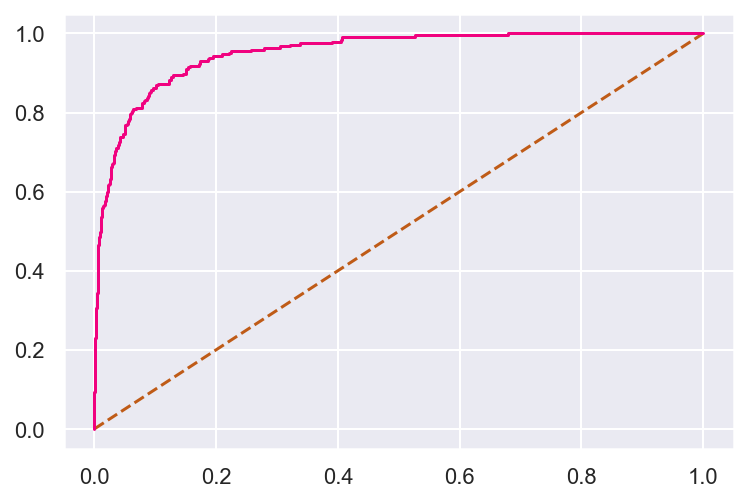

In [77]:
probs = lda_model.predict_proba(X_train)
probs = probs[:, 1]
auc = roc_auc_score(y_train,pred_train_lda_prob)
print('AUC: %.3f' % auc)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr);

In [78]:
y_class_pred=[]
for i in range(0,len(pred_test_lda_prob)):
    if np.array(pred_test_lda_prob)[i]>0.13:
        a=1
    else:
        a=0
    y_class_pred.append(a)

Text(0.5, 1.0, 'LDA_TEST')

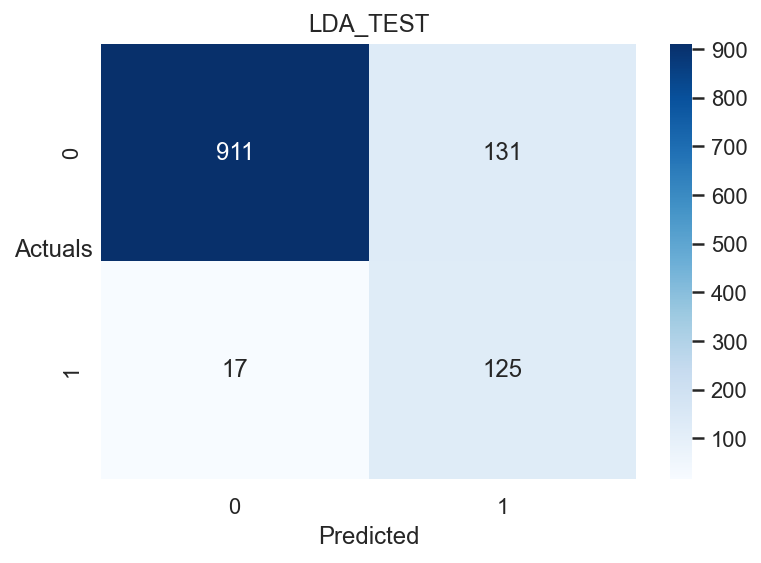

In [84]:
sns.heatmap((metrics.confusion_matrix(y_test, y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('LDA_TEST')

In [80]:
print(metrics.classification_report(y_test, y_class_pred,digits=3))

              precision    recall  f1-score   support

         0.0      0.982     0.874     0.925      1042
         1.0      0.488     0.880     0.628       142

    accuracy                          0.875      1184
   macro avg      0.735     0.877     0.777      1184
weighted avg      0.923     0.875     0.889      1184



AUC: 0.877


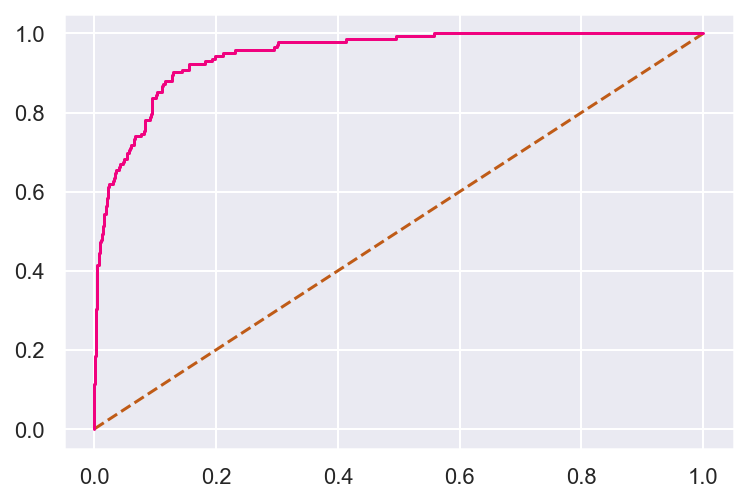

In [81]:
probs = lda_model.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, y_class_pred)
print('AUC: %.3f' % auc)
train_fpr, train_tpr, train_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr);

# Random Forest Classifier

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [1, 3, 5, 7, 9],
    'min_samples_leaf': [5, 10, 15, 20],
    'min_samples_split': [5, 15, 30, 45],
    'n_estimators': [25, 50]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid)

In [62]:
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 3, 5, 7, 9],
                         'min_samples_leaf': [5, 10, 15, 20],
                         'min_samples_split': [5, 15, 30, 45],
                         'n_estimators': [25, 50]})

In [63]:
grid_search.best_params_

{'max_depth': 7,
 'min_samples_leaf': 15,
 'min_samples_split': 45,
 'n_estimators': 50}

In [64]:
best_grid = grid_search.best_estimator_

In [65]:
pred_train_rf = best_grid.predict(X_train)
pred_test_rf = best_grid.predict(X_test)

In [66]:
print(metrics.classification_report(y_train, pred_train_rf))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      2157
         1.0       0.95      0.86      0.90       245

    accuracy                           0.98      2402
   macro avg       0.97      0.93      0.95      2402
weighted avg       0.98      0.98      0.98      2402



Text(0.5, 1.0, 'RF_TRAIN')

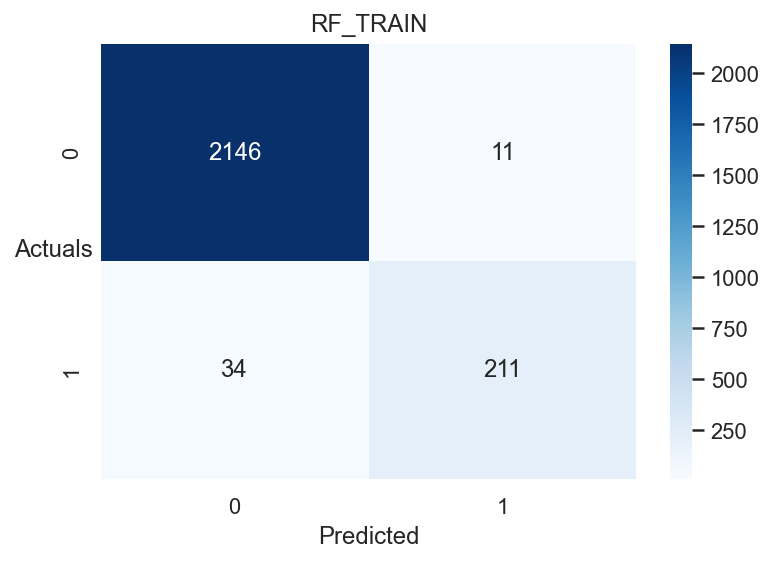

In [72]:
sns.heatmap((metrics.confusion_matrix(y_train,pred_train_rf)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('RF_TRAIN')

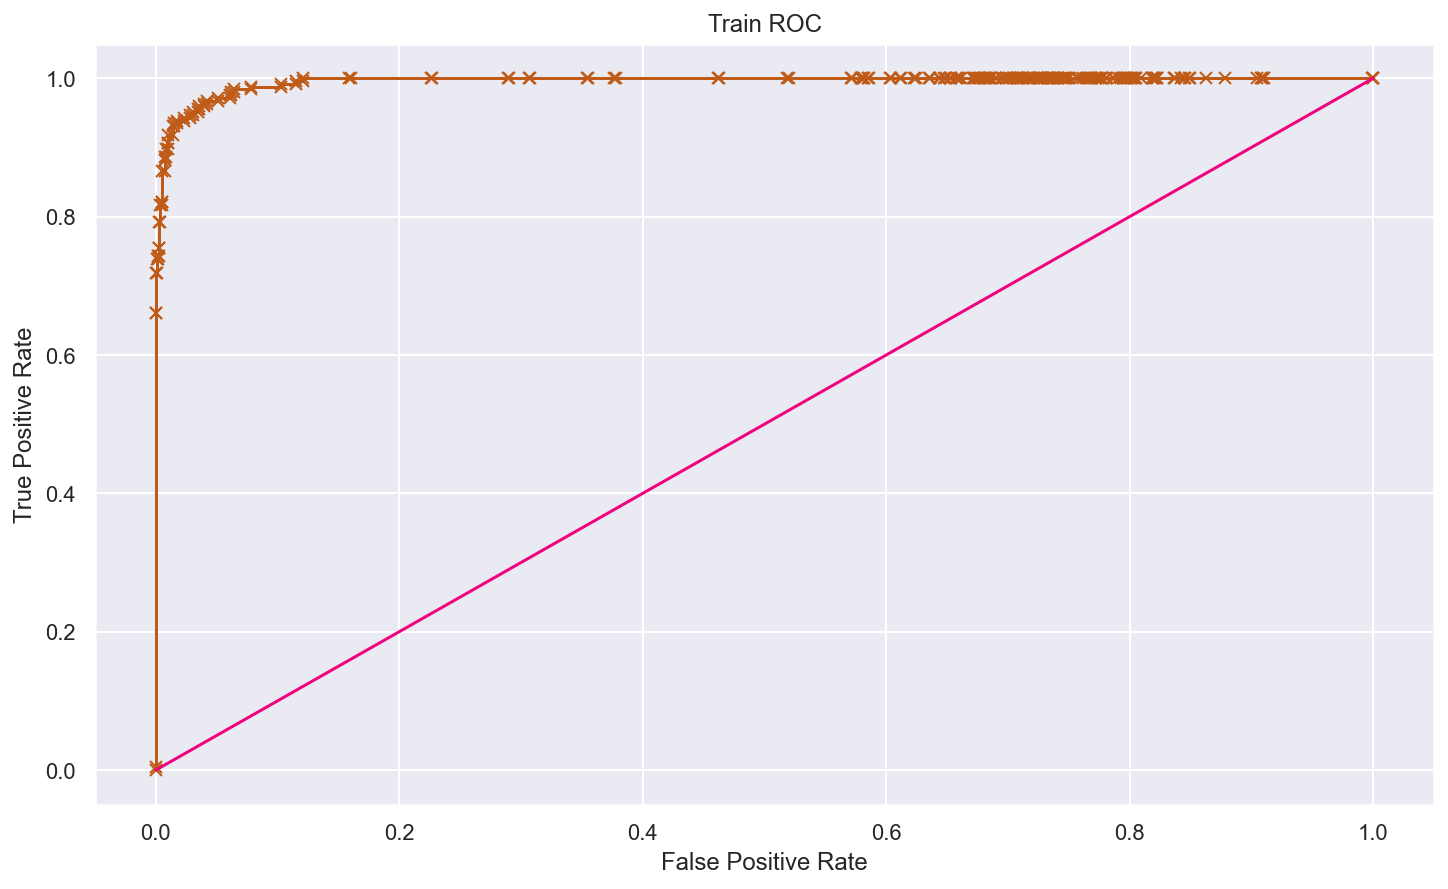

Area under Curve is 0.9951046899983916


In [82]:
#from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(y_train,best_grid.predict_proba(X_train)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Train ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_train,best_grid.predict_proba(X_train)[:,1]))

In [69]:
print(metrics.classification_report(y_test, pred_test_rf))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      1042
         1.0       0.95      0.88      0.91       142

    accuracy                           0.98      1184
   macro avg       0.97      0.94      0.95      1184
weighted avg       0.98      0.98      0.98      1184



Text(0.5, 1.0, 'RF_TEST')

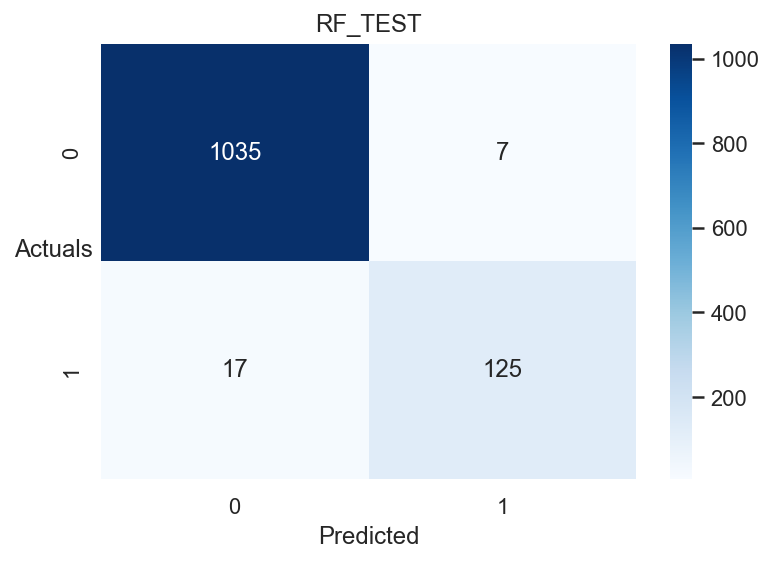

In [73]:
sns.heatmap((metrics.confusion_matrix(y_test, pred_test_rf)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('RF_TEST')

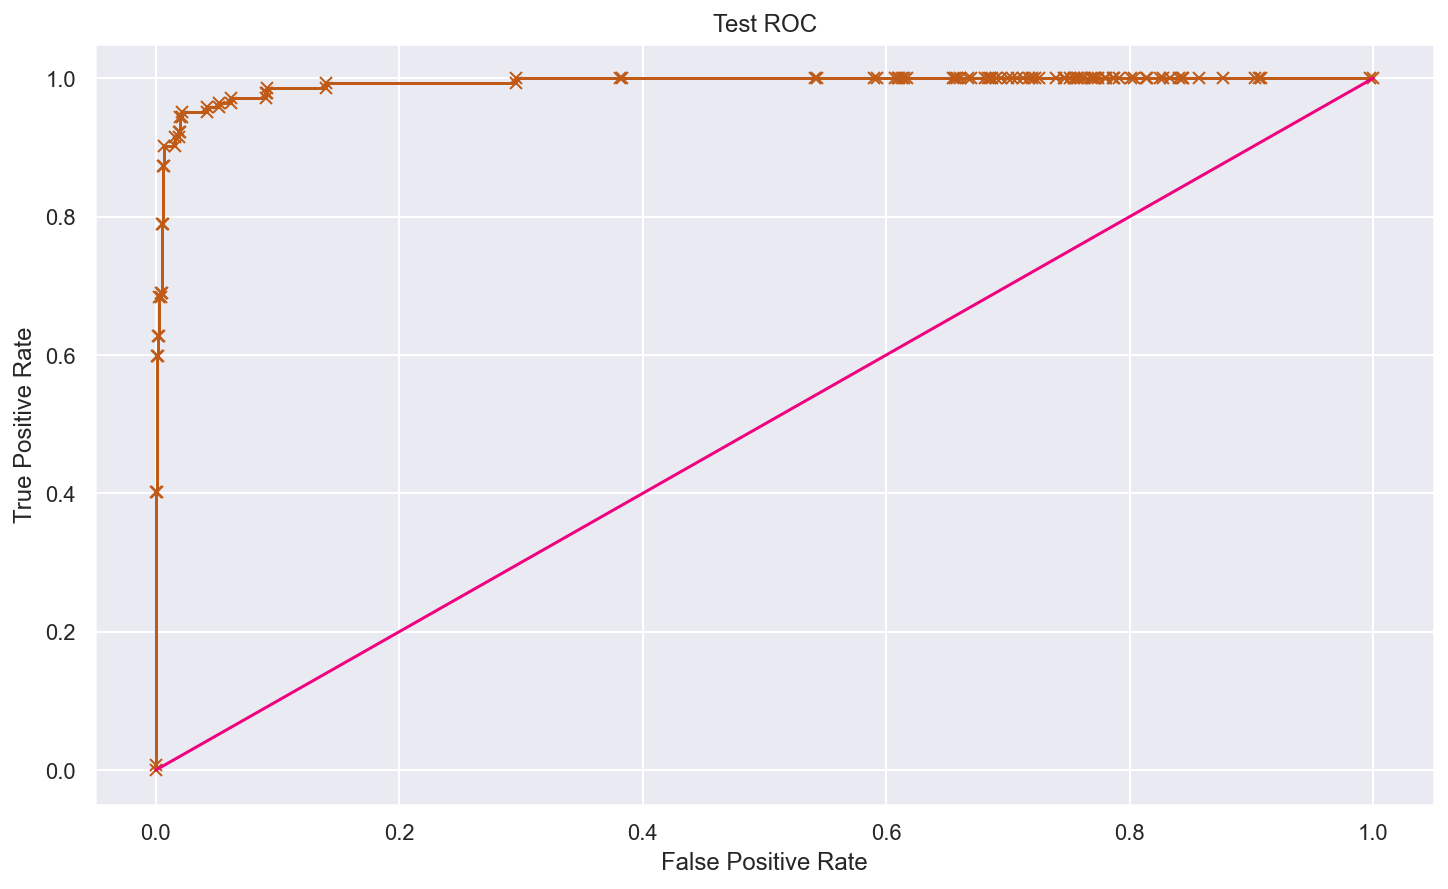

Area under Curve is 0.992052120786137


In [83]:
#from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(y_test,best_grid.predict_proba(X_test)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_test,best_grid.predict_proba(X_test)[:,1]))

## END